# TP CNN PyTorch
Dans ce TP, vous allez implémenter et étudier un *réseau de neurones à convolution* (Convolutional Neural Network - CNN).

## Configuration
### Si vous utilisez un ordinateur de l'Enseirb:
#### 1) Lancer une session linux (et non pas windows)
#### 2) Aller dans "Applications", puis "Autre", puis "conda_pytorch" (un terminal devrait s'ouvrir)
#### 3) Dans ce terminal, taper la commande suivante pour lancer Spyder :  
`spyder &`  
### Si vous utilisez votre ordinateur personnel, il faudra installer Spyder.  

---
---
## Ne pas oublier de configurer Spyder en suivant ces [instructions](https://gbourmaud.github.io/files/configuration_spyder_annotated.pdf).
---
---

# I) Opération de "convolution"


En *deep learning*, l'opération de *convolution*  ne correspond pas à la définition mathématique de la convolution. Il s'agit en réalité d'une simple inter-corrélation entre un filtre (ou plusieurs filtres) et l'image à laquelle on ajoute un scalaire appelé *biais*. 

Prenons un tenseur $X$ de taille CxMxN auquel on applique un *filtre* de taille 5x5. Les paramètres de ce *filtre* sont donc un tenseur $W$ de taille Cx5x5 et un scalaire $b$. Pour une telle opération l'équation s'écrie de la manière suivante :

$Y_{0,i,j}=\sum_{k=0}^C \sum_{m=0}^{4}  \sum_{n=0}^{4} W_{k,m,n}X_{k,i+m,j+n} + b$

où $Y$ est le tenseur de sortie.

Charger et afficher l'image [peppers.png](https://gbourmaud.github.io/files/intro_deep_learning/TP/TP_CNN/peppers.png).

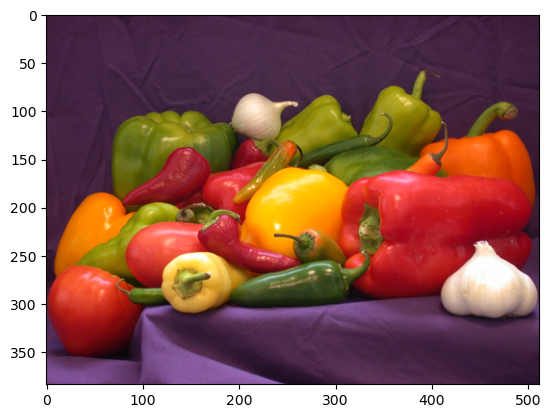

(<matplotlib.image.AxesImage at 0x79fe7cb7fa30>, None)

In [1]:
import matplotlib.pyplot as plt
import torch 
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import PIL.Image as Image

torch.random.manual_seed(0)

# Read an example image
I_PIL = Image.open('peppers.png')
I = transforms.ToTensor()(I_PIL)

# Visualize the input x
fig1,ax1 = plt.subplots()
ax1.imshow(I.permute((1,2,0))), plt.pause(0.1)

Utiliser l'attribut `shape` du tenseur `I` pour connaître sa taille. En PyTorch, une image est representée par un tenseur (tableau multidimensionnel) dont les dimensions sont nombre_canaux x nombre_lignes x nombres_colonnes, alors que pour la bibliothèque Matplotlib, une image doit être un tableau multidimensionnel de la forme nombre_lignes x nombre_colonnes x nombre_canaux. Lire la documentation de la fonction `permute` qui est utilisée sur la dernière ligne du code précédent.

Créer 12 filtres de taille 3x5x5 en initialisation leur coefficients aléatoirement.

In [3]:
# Create a bank of linear filters
W = torch.randn((12, 3, 5, 5))

Remarquons que ces filtres sont stockés dans un tenseur 4D.

Afficher ces 12 filtres.

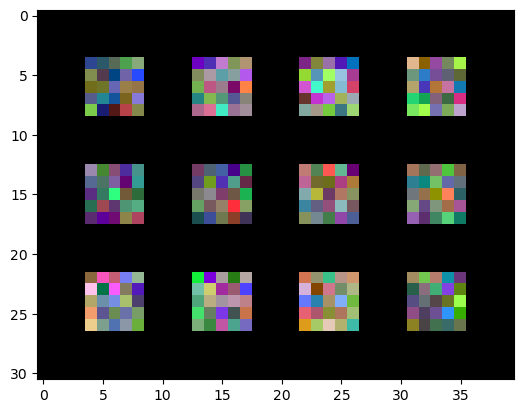

In [4]:
fig2,ax2 = plt.subplots()
ax2.imshow(torchvision.utils.make_grid(W, padding=4, nrow=4, normalize=True, scale_each=True).permute(1,2,0))

Appliquer ces 12 filtres à l'image `I`.

In [6]:
Y = F.conv2d(I.unsqueeze_(0), W, bias=None, stride=1, padding=0)

Remarquons qu'en entrée de cette opération de *convolution* le tenseur doit être de la forme taille_minibatch x nombre_canaux x nombre_lignes x nombre_colonnes.

Lire la documentation de la fonction `unsqueeze_`.

Quelle devrait être la taille du tenseur résultant de l'opération précédente ? Utiliser la méthode `shape` du tenseur `Y` pour observer sa taille.

Afficher les canaux du tenseur `Y` sous la forme d'images.

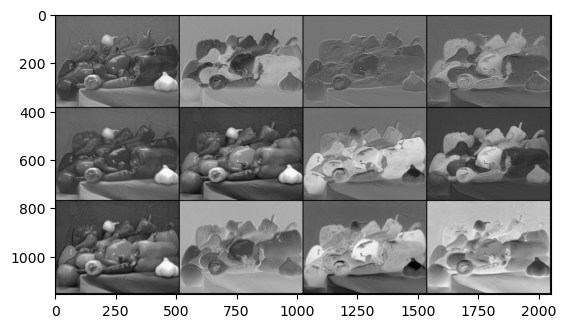

In [7]:
fig3,ax3 = plt.subplots()
ax3.imshow(torchvision.utils.make_grid(Y.transpose(1,0), padding=4, nrow=4, normalize=True, scale_each=True).permute(1,2,0))

Observer les différents canaux de `Y`. En principe, plusieurs, voire la plupart, de ces canaux ont des réponses fortes au niveau des contours des objets. Rappelons que les filtres ont été initialisés aléatoirement selon une distribution centrée, ainsi la moyenne d'un canal du filtre est probablement proche de zéro. Dans ce contexte, est-il normal d'observer ces fortes réponses au niveau des contours ? **Indice : quel est le résultat d'un filtre, dont la moyenne est zéro, appliqué sur une zone uniforme (c'est-à-dire dont la couleur est constante) ?**

Pour le moment, l'opération de *convolution* conserve la résolution de l'image d'entrée (sauf au niveau des bords) car nous avons utilisé une *stride* de 1. Il est souvent utile de réduire la résolution en sortie d'une couche de convolution. Pour cela il suffit d'augmenter la *stride*.

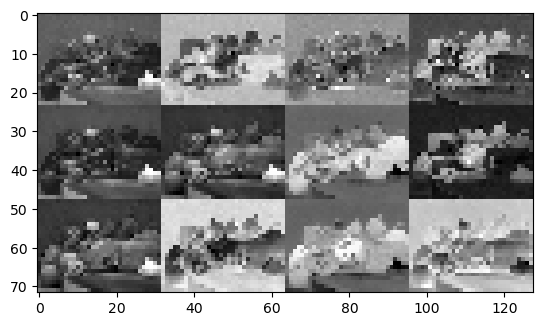

In [8]:
# Try again, downsampling the output
Y_ds = F.conv2d(I, W, bias=None, stride=16, padding=0)
fig4,ax4 = plt.subplots()
ax4.imshow(torchvision.utils.make_grid(Y_ds.transpose(1,0), padding=0, nrow=4, normalize=True, scale_each=True).permute(1,2,0)) 

Jusqu'à présent, l'opération de *convolution* utilisée avec une *stride* de 1 produit des effets aux bords, ce qui rend le tenseur en sortie plus petit d'un nombre de lignes et de colonnes dépendant de la taille des filtres. S'il est important d'éviter cela, le tenseur d'entrée peut être complété par des zéros (option *padding*).

<Figure size 640x480 with 0 Axes>

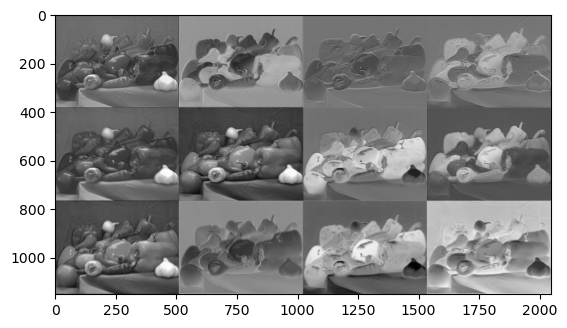

In [9]:
# Try padding 
Y_pad = F.conv2d(I, W, bias=None, stride=1, padding=2)
fig = plt.figure(5)
fig5,ax5 = plt.subplots()
ax5.imshow(torchvision.utils.make_grid(Y_pad.transpose(1,0), padding=0, nrow=4,
normalize=True, scale_each=True).permute(1,2,0))

Le tenseur `Y_pad` a-t-il la même taille que le tenseur d'entrée `I` ? Visualiser `Y_pad` et expliquer le résultat obtenu aux bords.

**En pratique, il est rare d'utiliser F.conv2d pour implémenter une couche de convolution car il s'agit d'une fonction. Par conséquent, les paramètres (filtres et biais) doivent être passés en argument à chaque utilisation de la fonction et gérés par l'utilisateur. On privilégiera l'implémentation d'une couche de convolution du paquet `torch.nn` : `nn.Conv2d`. Il s'agit de l'équivalent de la couche "Fully Connected" `nn.Linear` utilisée dans le TP précédent. Ainsi `nn.Conv2d` n'est pas une fonction mais une classe (programmation orientée objet). Une couche de convolution doit donc être instanciée `convLayer = nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)` afin d'obtenir un objet `convLayer`. Les paramètres (filtres et biais) peuvent être accédés de la manière suivante : `convLayer.weight` et `convLayer.bias`. La couche de convolution peut être appliquée à un tenseur de la manière suivante : `Y = convLayer(X)`.**

# II) Implémentation d'un CNN pour MNIST

Le code suivant permet de définir l'architecture d'un CNN. Rappelons qu'une imagette MNIST est de taille 1x28x28 (l'image n'a qu'un seul canal car elle est en niveaux de gris).

In [ ]:
#%% CNN
class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=2, padding=2),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=2, padding=2),
            nn.ReLU())
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

**Faire un dessin du réseau en indiquant la taille de chaque tenseur en entrée et en sortie de chaque fonction.**

Le code suivant permet d'instancier un CNN (sur GPU si une carte compatible est disponible, sinon sur CPU) et de compter le nombre de paramètres à optimiser que contient ce CNN.

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = CNN(10).to(device)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print('Number of parameters = {}'.format(count_parameters(model)))

**Sur feuille, calculer le nombre de paramètres de chaque couche du CNN et comparer le résultat aux 28938 paramètres que le code a obtenu.**

## Apprentissage sur MNIST

Vous pouvez récupérer la base MNIST ainsi que le dataset PyTorch dans le [TP précédent](https://github.com/gbourmaud/gbourmaud.github.io/blob/master/files/intro_deep_learning/TP/TP_MLP/TP_MNIST_PyTorch_TensorBoard.ipynb).

**REMARQUE 1 : Le MLP prenait en entrée un minibatch de vecteurs, donc un tenseur 3D  de la forme (taille_batch x 784). Le CNN ne prend pas en entrée un minibatch de vecteurs mais un minibatch d'images, donc un tenseur 4D de la forme (taille_batch x 1 x 28 x 28).**  


**REMARQUE 2 : une epoch ne devrait prendre que quelques secondes, et vous devriez obtenir très rapidement (moins de 5 epochs) un taux de bonne classification de plus de 95%.**



**Comme vu en cours, vous pouvez remplacer la dernière partie de ce CNN (qui vectorise le tenseur puis applique une couche FC) par une couche de convolution. Le résultat devrait être identique.**  

**Utilisez TensorBoard pour vérifier visuellement l'évolution des performances au cours de l'entraînement.**  

Optionnel : Comme vous pouvez le constater, les "détails" sont très importants pour que l'entraînement se déroule correctement. Voici un exemple : dans votre `train_loader`, mettez `shuffle=False`. Ceci va avoir pour conséquence de générer des minibatches en parcourant linéairement la base de données. Ainsi les premiers minibatches seront composés uniquement de zéros, puis viendront des minibatches composés uniquement de uns, etc. Vous devriez constater que dans ce cas les résultats sur l'ensemble de validation sont catastrophiques.  

## MNIST TRANSLATION

**Lancer un apprentissage sur la base de données [MNIST Translation](https://gbourmaud.github.io/files/intro_deep_learning/TP/TP_CNN/MNISTTranslationDataset.py). Vous pouvez rajouter une couche de convolution + ReLU à votre réseau pour agrandir son champ récepteur.
Vous devriez obtenir de meilleurs résultats (plus de 95% de bonne classification) par rapport à ceux obtenus au [TP précédent](https://github.com/gbourmaud/gbourmaud.github.io/blob/master/files/intro_deep_learning/TP/TP_MLP/TP_MNIST_PyTorch_TensorBoard.ipynb) avec le MLP.** 

  
**Pouvez-vous expliquer cette amélioration des performances ? Indice : une couche de *convolution* est équivariante par translation, c'est-à-dire que si l'entrée est translatée, la sortie est également translatée.**  

Vous trouverez une correction ci-après.

In [ ]:
import torch
from MNISTTranslationDataset import MNISTTranslationDataset
import torchvision.transforms as T
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.utils.tensorboard import SummaryWriter
from CNN import CNN

writer = SummaryWriter()

torch.random.manual_seed(0)
path_MNIST_train = '/tmp/MNIST/Training'                
training_set = MNISTTranslationDataset(path_MNIST_train)

# Show 4 pairs of data
plt.figure(1)
for i in range(4):
    image, label, _ = training_set[i]
    plt.subplot(1,4,i+1)
    plt.imshow(T.ToPILImage()(image))
    plt.title('True label {}'.format(label))
    
plt.pause(1.)


batch_size = 100
train_loader = torch.utils.data.DataLoader(dataset = training_set,
                                       batch_size=batch_size,
                                       shuffle=True,
                                       num_workers=3)
images, labels, _ = next(iter(train_loader))

# Show 4 pairs of data
plt.figure(2)
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(T.ToPILImage()(images[i,:,:,:]))
    plt.title('True label {}'.format(labels[i]))
    
plt.pause(1.)

path_MNIST_valid = '/tmp/MNIST/Testing'                
valid_set = MNISTTranslationDataset(path_MNIST_valid)
valid_loader = torch.utils.data.DataLoader(dataset = valid_set,
                                       batch_size=batch_size,
                                       shuffle=False,
                                       num_workers=3)


def validation(valid_loader, model):
    model.eval()
    # Test the model
    # In test phase, we don't need to compute gradients (for memory efficiency)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels, _ in valid_loader:            
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return (correct, total)

#%% HYPERPARAMETERS
lr = 1e-3 #learning rate
beta = 0.9 #momentum parameter
n_epoch = 100 #number of iterations

model = CNN(10)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)  
criterion = nn.CrossEntropyLoss()

num_batch = len(train_loader) #600 batches each containing 100 images = 60000 images

training_loss_v = []
valid_acc_v = []

(correct_best, total) = validation(valid_loader, model)
print ('Epoch [{}/{}], Valid Acc: {} %'
           .format(0, n_epoch, 100 * correct_best / total))
valid_acc_v.append(correct_best / total)

writer.add_scalar("Accuracy/valid", correct_best / total, 0)

for epoch in range(n_epoch):
    model.train()
    loss_tot = 0

    for i, (images, labels,_) in enumerate(train_loader):
            
        #Forward Pass
        O = model.forward(images)
        
        #Compute Loss
        l = criterion(O, labels)
        
        #Print Loss
        loss_tot += l.item()
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Batch Loss: {:.4f}' 
                   .format(epoch+1, n_epoch, i+1, num_batch, l.item()/len(labels)))
    
        #Backward Pass (Compute Gradient)
        optimizer.zero_grad()
        l.backward()
        
        #Update Parameters
        optimizer.step() 
        
        
        
    
    (correct, total) = validation(valid_loader, model)
    if(correct > correct_best): #early stopping
        correct_best = correct
        torch.save(model.state_dict(), './model.pt')
        print('Saving model : {}% valid accuracy'.format(100 * correct / total))
        
    print ('Epoch [{}/{}], Training Loss: {:.4f}, Valid Acc: {} %'
           .format(epoch+1, n_epoch, loss_tot/len(training_set), 100 * correct / total))
    training_loss_v.append(loss_tot/len(training_set))
    valid_acc_v.append(correct / total)
    
    writer.add_scalar("Loss/train", loss_tot/len(training_set), epoch+1)
    writer.add_scalar("Accuracy/valid", correct / total, epoch+1)

    
writer.flush()
writer.close()
 

Après avoir effectué un apprentissage, vous pouvez tester votre modèle de la manière suivante :

In [ ]:
from CNN import CNN
import torch.nn as nn
import torch
from MNISTTranslationDataset import MNISTTranslationDataset
import matplotlib.pyplot as plt
import torchvision.transforms as T


model = CNN(10)
model.load_state_dict(torch.load('model.pt', weights_only=True))
model.eval()

#%% plot results

path_MNIST_valid = '/tmp/MNIST/Testing'                
valid_set = MNISTTranslationDataset(path_MNIST_valid)

img,_,_ = valid_set[3598]
model.eval()
outputs = model(img.unsqueeze(0))
_, predicted = torch.max(outputs.data, 1)
fig,ax = plt.subplots()
ax.imshow(T.ToPILImage()(img))
ax.set_title('Predicted class : {}'.format(predicted[0]))

# (optionnel) III) Champ récepteur (Receptive field)

Considérons le précédent CNN. Intéressons-nous au tenseur `X` issu de la deuxième couche de convolution. La valeur d'un pixel de `X`, par exemple le pixel situé à la 5ème ligne et 6ème colonne (`X[1,1,4,5]`), a été obtenu en réalisant des opérations impliquant, non pas la totalité de l'image d'entrée `I`, mais une région $R$ de `I`. C'est-à-dire que les pixels de `I` situés en dehors de cette région $R$ n'interviennent pas dans le calcul de `X[1,1,4,5]`.

La taille de cette région $R$ s'appelle le [*champ récepteur*](https://distill.pub/2019/computing-receptive-fields/) (Réceptive Field an anglais).

Le champ récepteur $c$ d'une unique couche de convolution correspond à la taille $k$ des filtres. Lorsqu'on met en cascade plusieurs couches de convolution, alors le champ récepteur dépend de la taille $k$ des filtres de chaque couche ainsi que de la stride $s$ de chaque couche. Le calcul du champ récepteur peut donc se calculer théoriquement. Dans la suite nous allons calculer le champ récepteur expérimentalement.

## Calcul expérimental du champ récepteur d'une couche de convolution
Il existe plusieurs manières de calculer expérimentalement le champ récepteur d'un CNN. Ici nous allons utiliser une méthode faisant appel au calcul de la dérivée.

Commençons par le cas d'un seule couche de convolution.

Prenons le cas d'un tenseur `X` issu d'une couche de convolution prenant en entrée un tenseur `I`. La valeur d'un pixel $p$ de `X`, par exemple le pixel $p=[6,4]$ situé à la 5ème ligne et 7ème colonne (`X[0,1,4,6]`), a été obtenu en réalisant une combinaison linéaire des pixels présent dans le champ récepteur $R_p$ de `I`. 

Ainsi les pixels de `I` situés en dehors de cette région $R_p$ n'interviennent pas dans le calcul de `X[0,1,4,6]`. Cela signifie que la dérivée de `X[0,1,4,6]` par rapport à `I` vaut zéro pour tous les pixels n'appartenant pas à $R_p$.

**Travail à effectuer dans un script en PyTorch :**
- Définir une couche de convolution (`nn.Conv2d`)
- Charger une image `I` (par exemple `peppers.png`), en rajoutant une dimension (`.unsqueeze_(0)`) et en activant ses gradients (`.requires_grad_()`)
- Appliquer la convolution à cette image pour obtenir un tenseur `X`
- Calculer la dérivée d'un pixel $p$ de `X` par rapport à `I` (exemple : `X[0,1,4,6].backward()`), 
- Créer un masque des gradients (`I.grad`) dont la valeur absolue et strictement positive
- Afficher ce masque en le multipliant à `I`. Vous devriez en principe voir apparaître la région de `I` correspondant au champ récepteur du pixel $p$ de `X`.
- Vérifier que la taille de ce carré correspond à ce que vous obtenez avec la formule obtenue dans la partie précédente.
- Faire varier les paramètres de *stride* et de taille du filtre.

Lorsque le code précédent fonctionne, c'est-à-dire qu'il vous permet de calculer de champ récepteur d'une couche de convolution, vous pouvez le tester sur un réseau CNN. Récupérer l'architecture [ResNet18](https://pytorch.org/vision/main/models/generated/torchvision.models.resnet18.html) puis calculer et visualiser le champ récepteur à la sortie de chaque ResBlock.